In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
data = pd.read_csv("tsp.csv", index_col=0)
data.x = data.x.astype(int)
data.y = data.y.astype(int)

In [ ]:
def dist(d):
    return sum(np.abs(np.diff(d.x)) + np.abs(np.diff(d.y)))

In [721]:
def plotData(df, title):
    repeated = pd.DataFrame(np.repeat(df.x,2))
    repeated["y"] = np.repeat(df.y,2).shift(1).fillna(0).astype("int")
    repeated = repeated.iloc[1:]
    plt.figure(figsize=(10,10))
    plt.plot(repeated.x, repeated.y, 'r', lw=1)
    plt.scatter(data.x, data.y, s=80)
    plt.title(title)

In [ ]:
def mcRandomSamplingOpt(data, itercount = 10000):
    min_dist = dist(data)
    cur_data = list(data.index.values)
    best_data = cur_data
    for i in range(0,itercount):
        cur_data = np.random.permutation(data.index.values)
        sampled_data = data.loc[cur_data]
        cdist = dist(sampled_data)
        if(cdist < min_dist):
            min_dist = cdist
            best_data = cur_data
    print("Distance: ", min_dist)
    return best_data

In [ ]:
mc_data = mcRandomSamplingOpt(data, 100000)

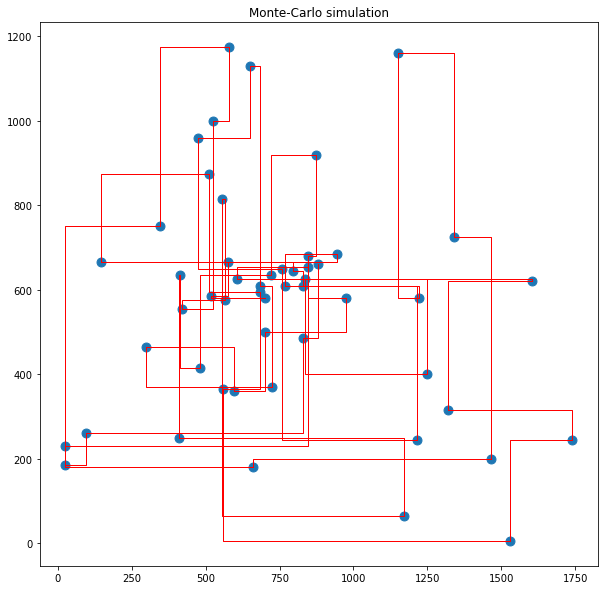

In [722]:
plotData(data.loc[mc_data], "Monte-Carlo simulation")

In [ ]:
def Mutate(old_state):
    new_state = old_state.copy()
    dlen = len(new_state)
    rand1 = random.randint(0, dlen - 1)
    rand2 = random.randint(0, dlen - 1)
    new_state[rand1], new_state[rand2] = new_state[rand2], new_state[rand1]
    return new_state


In [ ]:
def randomWalkOpt(data, itercount = 100000):
    min_dist = dist(data)
    cur_data = data.index.values.copy()
    best_data = cur_data.copy()
    dlen = len(cur_data)
    for i in range(0,itercount):
        cur_data = Mutate(cur_data)
        cdist = dist(data.loc[cur_data])
        if(cdist < min_dist):
            min_dist = cdist
            best_data = cur_data.copy()
    print("Distance:", min_dist)
    return best_data


In [ ]:
rw_inds = randomWalkOpt(data)

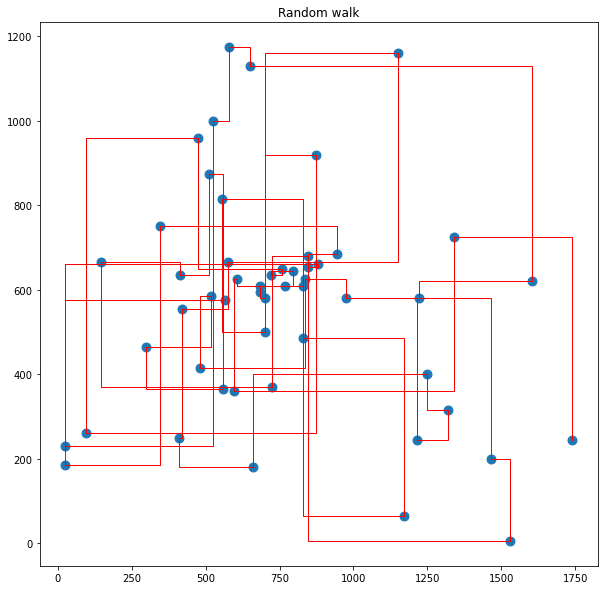

In [723]:
plotData(data.loc[rw_inds], "Random walk")

In [725]:
def hillClimbOpt(data, itercount = 50000):
    min_dist = dist(data)
    cur_data = data.index.values
    best_data = cur_data.copy()
    dlen = len(cur_data)
    swaps = [(i,j) for i in range(0, dlen - 1) for j in range(i, dlen -1)]

    for i in range(0,itercount//len(swaps)):
        for m,n in swaps:
            cur_data = best_data.copy()
            cur_data[m], cur_data[n] = cur_data[n], cur_data[m]
            cdist = dist(data.loc[cur_data])

            if(cdist < min_dist):
                min_dist = cdist
                best_data = cur_data.copy()
    return best_data

In [733]:
inds = hillClimbOpt(data, 10000)
print("Hill climb distance: ", dist(data.loc[inds]))

Hill climb distance:  12815


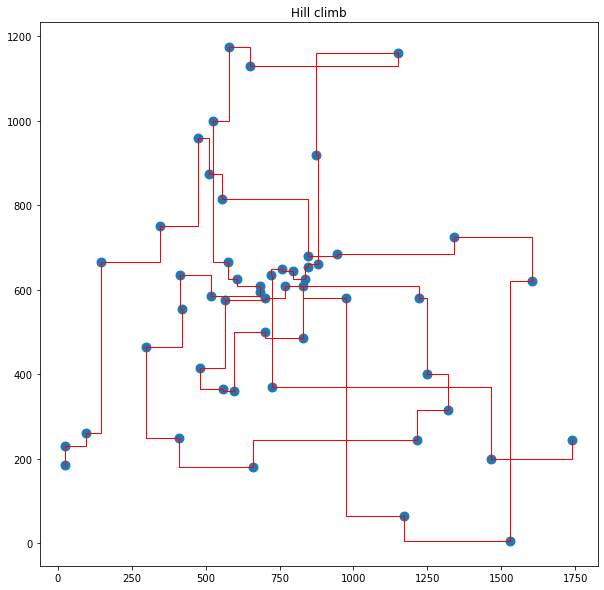

In [734]:
plotData(data.loc[inds], "Hill climb")

In [729]:
def simulatedAnnealingOpt(data, itercount = 10000):
    start_temp = 100
    min_temp = 0.01
    t = start_temp
    best_dist = dist(data)
    cur_ind = data.index.values.copy()
    best_ind = cur_ind
    dlen = len(cur_data)
    for i in range(1,itercount):
        t = start_temp - (start_temp - min_temp)*i/itercount
        cur_ind = Mutate(best_ind)
        cdist = dist(data.loc[cur_ind])
        delta_e = cdist - best_dist
        if(delta_e < 0):
            best_ind = cur_ind.copy()
            best_dist = cdist
        elif(random.random() < np.exp(-delta_e/t)):
            best_ind = cur_ind.copy()
            best_dist = cdist
        if(t<min_temp):
            break
    return best_ind

In [731]:
sa_inds = simulatedAnnealingOpt(data, 10000)

Distance:  12410


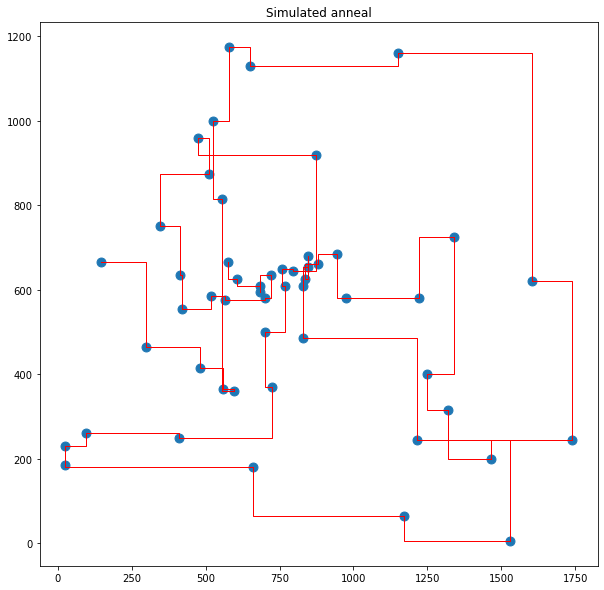

In [732]:
print("Distance: ", dist(data.loc[sa_inds]))
plotData(data.loc[sa_inds], "Simulated anneal")

In [ ]:
def Crossover(inds1, inds2):
    from_point = random.randint(0,len(inds1)-2)
    to_point = random.randint(from_point,len(inds1)-1)
    child = np.zeros(len(inds1)) 
    child[from_point:to_point] = inds1[from_point:to_point]
    fill_ind = 0
    i = 0
    for ind in inds2:
        i+=1
        if(ind not in child[from_point:to_point]):
            if(fill_ind >= from_point and fill_ind <= to_point):
                fill_ind = to_point
            child[fill_ind] = ind
            fill_ind+=1

    return child

In [806]:
def GeneticOpt(population_size = 100, iter_count = 10000, mutation_p = 0.3):

    population = []
    for i in range(0, population_size):
        population.append(np.random.permutation(data.index.values).copy())
        

    for i in range(0, iter_count):
        dists = np.array([1/dist(data.loc[x]) for x in population])
        p = dists/sum(dists)
        parent1, parent2 = (random.choices(population, p, k = 2))
        child1 = Crossover(parent1, parent2)
        child2 = Crossover(parent2, parent1)
        if(random.random() < mutation_p):
            dlen = len(child1)
            rand1 = random.randint(0, dlen - 1)
            rand2 = random.randint(0, dlen - 1)
            child1[rand1], child1[rand2] = child1[rand2], child1[rand1]
            child2[rand1], child2[rand2] = child2[rand2], child2[rand1]

        population.append(child1)
        population.append(child2)

        population.pop(np.argmin(dists))
        population.pop(np.argmin(dists))


    return [dist(data.loc[x]) for x in population]



    #for i in range(0, iter_count):
go_inds = GeneticOpt()

In [807]:
go_inds

[19045,
 19715,
 18845,
 19735,
 19765,
 19765,
 19765,
 19765,
 19765,
 19765,
 19765,
 19765,
 19765,
 19715,
 19045,
 19765,
 19765,
 19765,
 19045,
 19765]

[3, 4]